## Import required modules

In [1]:
import pandas as pd
import pandas_profiling 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

## Function Definition

In [2]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

In [3]:
def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [4]:
def describe_missing_val(df):
    tmp_df = df.isnull()
    for column_name in tmp_df.columns:
        n_missing_val = sum(tmp_df[column_name])
        print('{}: {}'.format(column_name, n_missing_val))

In [5]:
def get_PPV(df):
    """
    Calculate Precission or Positive Predictive Values
    """
    grouped_df = df.groupby('classifier')
    TP = grouped_df['true_positive'].sum()
    FP = grouped_df['false_positive'].sum()
    return TP / (TP + FP) * 100

In [6]:
def get_TPR(df):
    """
    Calculate Recall or True Positive Rate
    """
    grouped_df = df.groupby('classifier')
    TP = grouped_df['true_positive'].sum()
    FN = grouped_df['false_negative'].sum()
    return TP / (TP + FN) * 100

In [7]:
def get_fscore(df):
    """
    Calculate F-Score
    """
    PPV = get_PPV(df)
    TPR = get_TPR(df)
    return (PPV * TPR) / (PPV+TPR)

## Dataset

Load dataset

In [8]:
fpath = "./evaluation_summary.csv"
df = pd.read_csv(fpath)

## Data Profiling 

Identify features of interest and their assiciated data type

In [9]:
df.dtypes

classifier        object
true_positive      int64
false_positive     int64
false_negative     int64
dtype: object

In [10]:
print_categories(df)

classifier :  Categorical
true_positive :  Numerical
false_positive :  Numerical
false_negative :  Numerical


View the first few bits of data (begining, end, random)

In [11]:
df.head(n=5)

,classifier,true_positive,false_positive,false_negative
0,def,6,0,0
1,al2,3,0,0
2,tre,1,0,3
3,al2,2,0,2
4,alt,3,0,0


In [12]:
df.tail(n=5)

,classifier,true_positive,false_positive,false_negative
771,al2,2,0,0
772,alt,2,0,0
773,tre,1,0,1
774,def,2,1,0
775,alt,2,0,0


In [13]:
df.sample(n=5)

,classifier,true_positive,false_positive,false_negative
531,tre,2,0,7
203,al2,4,0,2
337,alt,4,0,0
82,alt,6,0,0
366,alt,3,0,2


### Missing Values

Identify number of missing value for each feature (i.e., columm) in the dataset
        

In [14]:
describe_missing_val(df)

classifier: 0
true_positive: 0
false_positive: 0
false_negative: 0


### Descriptive Statistics

In [15]:
df.describe()

,true_positive,false_positive,false_negative
count,776.000000,776.000000,776.000000
mean,3.905928,0.070876,2.114691
std,2.271885,0.289832,2.107680
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000
75%,6.000000,0.000000,3.000000
max,10.000000,3.000000,11.000000


### Automated Profiling Report

In [16]:
pandas_profiling.ProfileReport(df)

Number of variables,4
Number of observations,776
Total Missing (%),0.0%
Total size in memory,24.3 KiB
Average record size in memory,32.1 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Boxplot

Configure Seaborn

In [17]:
sns.set()
sns.axes_style

<function seaborn.rcmod.axes_style>

In [18]:
df = df.sort_values(by='classifier')

Text(0,0.5,'false negative')

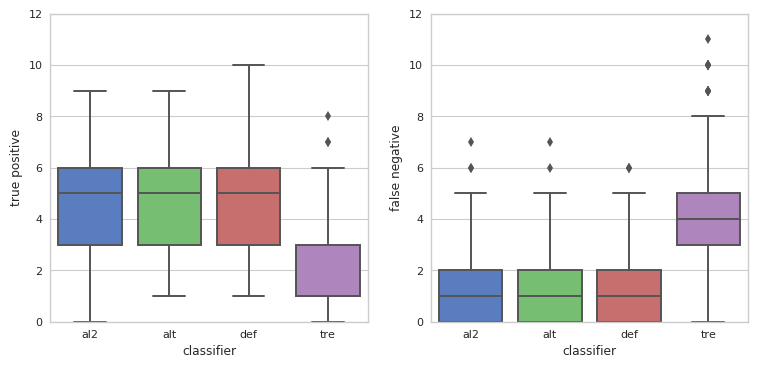

In [19]:
plt.figure(figsize=(9,4))

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.set_style(style='whitegrid')
sns.set_context(context='paper')

plt.subplot(121)
b = sns.boxplot(x="classifier", y="true_positive", data=df)
b.set_ylim((0, 12))
b.set_xlabel("classifier")
b.set_ylabel("true positive")

# plt.subplot(132)
# sns.boxplot(x="classifier", y="false_positive", data=df)

plt.subplot(122)
b = sns.boxplot(x="classifier", y="false_negative", data=df)
b.set_ylim((0, 12))
b.set_xlabel("classifier")
b.set_ylabel("false negative")

#### Precission or Positive Predictive Values (PPV)
The probability that an image with a positive test actually is a human face. 
In other words, the fraction of relevant instances among the detected/retrieved instances.

$PPV = \frac{TP}{TP+FP}$


#### Sensitivity or Recall or True Positive Rate (TPR)
The probability of face images which are correctly identified as human faces. 
In other words, the fraction of relevant instances that have been detected/retrieved over the total amount of relevant instances.

$TPR = \frac{TP}{TP+FN}$

In [20]:
plot_df = pd.concat({'PPV': get_PPV(df), 'TPR': get_TPR(df)}, axis=1)

Text(0,0.5,'precision (%)')

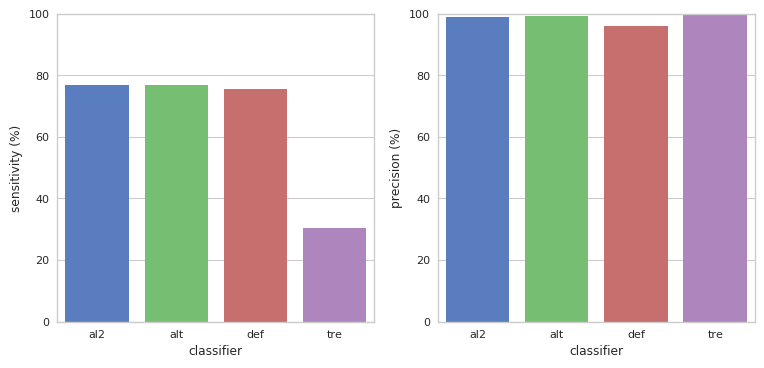

In [22]:
plt.figure(figsize=(9,4))

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.set_style(style='whitegrid')
sns.set_context(context='paper')

plt.subplot(121)
b = sns.barplot(x=plot_df.index, y="TPR", data=plot_df)
b.set_ylim((0, 100))
b.set_xlabel("classifier")
b.set_ylabel("sensitivity (%)")

plt.subplot(122)
b = sns.barplot(x=plot_df.index, y="PPV", data=plot_df)
b.set_ylim((0, 100))
b.set_xlabel("classifier")
b.set_ylabel("precision (%)")